In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

### Задание 4
#Рассчитайте 99% доверительный интервал для следующего примера:

In [3]:
mu=10
sd=5
n=100

In [8]:
se= 5 / (100 **0.5)

In [19]:
print (10 - 2.576* se, ':', 10 + 2.576* se)

8.712 : 11.288


### Задание 7
Использование доверительных интервалов зачастую рассматривают как альтернативный способ проверки гипотез.
В нашем случае, если значение 20 (предполагаемое среднее значение в генеральной совокупности) не будет принадлежать 95% доверительному интервалу, рассчитанному по выборочным данным, то у нас будет достаточно оснований отклонить нулевую гипотезу.

Проверьте согласуются ли результаты двух этих подходов: рассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.  Параметры: 
n=64,sd=4, mu=18.5

In [21]:
se_7= 4 / (64 **0.5)

In [22]:
print (18.5 - 1.96* se_7, ':', 18.5 + 1.96* se_7)

17.52 : 19.48


### Задание 10
В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p-уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

In [ ]:
mu=118
n=144
sd=9

In [24]:
se_10= 9 / (144 **0.5)

In [25]:
print (118 - 1.96* se_10, ':', 118 + 1.96* se_10)

116.53 : 119.47


_______________________

# ПРОЕКТ
Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

### Задания

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

### Описание данных
- timestamp – дата и время (точность до часа)
- cnt – количество аренд велосипедов за этот час
- t1 – температура, в С
- t2 – температура "ощущается как", в С 
- hum – влажность (%)
- wind_speed – скорость ветра, км/ч
- weather_code – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain 

10 – дождь с грозой

26 – снегопад 

94 – ледяной туман (да, такое бывает!)

isholiday – является ли день праздником (1 – праздник, 0 – нет)

isweekend –  является ли день выходным (1 – выходной, 0 – нет)

season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)


In [41]:
london =pd.read_csv('london.csv', sep = ',')

In [48]:
london['timestamp']=pd.to_datetime(london['timestamp'])
london.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


### Задача 2
Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

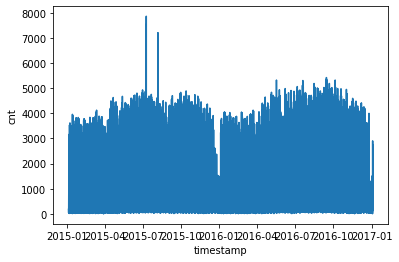

In [49]:
sns.lineplot(x='timestamp', y='cnt', data=london)

### Задача 3
Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут.
Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

<AxesSubplot:xlabel='timestamp'>

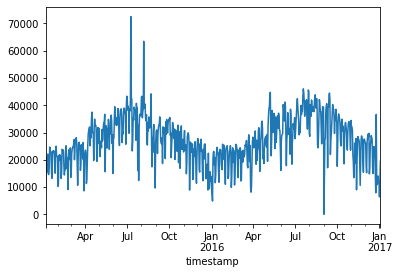

In [62]:
london3=london
london3.set_index('timestamp').sort_values('timestamp').resample(rule='D').cnt.sum().plot()

### Задача 4
Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в те дни - и насколько эти изменения для нас неожиданны 🤔. Для этого мы попробуем построить доверительный интервал вокруг данных - всё, что выпадает за его пределы, будет считаться аномалией, и на отдельные из них мы потом и посмотрим.

Однако не всё так просто. Мы сейчас работаем с временным рядом - последовательностью значений, меняющейся во времени. Мы не можем просто так посчитать доверительный интервал для всего: так мы можем упустить важные характеристики данных! Например, сезонные колебания. 

Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее. Для этого разделим дальнейшие действия на несколько этапов:

-сначала посчитаем скользящее среднее, чтобы сгладить ряд
-далее – разницу между наблюдаемыми и сглаженными значениями
-определим верхние и нижние границы 99% доверительного интервала 
-найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [63]:
london4=london3.set_index('timestamp').sort_values('timestamp').resample(rule='D').cnt.sum()

In [67]:
london_4_avg=london4.rolling(window=3).mean().reset_index()

In [70]:
london_4_avg.query("timestamp == '2015-07-09'")

,timestamp,cnt
186,2015-07-09,50705.0


### Задача 5
Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b

std = np.std(c)

В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [77]:
london4=london4.reset_index()

In [79]:
london5 = london4.merge(london_4_avg, how = 'left', on = 'timestamp')

In [81]:
london5['diff']=london5.cnt_x - london5.cnt_y

In [97]:
std=np.std(london5['diff'])
std

4558.58664111794

### Задача 6
Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

- upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
- lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [91]:
london6=london5.rename(columns={'cnt_y':'roll_avg'})
london6.head(1)

,index,timestamp,cnt_x,roll_avg,diff
0,0,2015-01-04,9234,NaN,NaN


In [135]:
london6['upper_bound']= london6.roll_avg +2.576*std  #верхняя граница

In [136]:
london6['lower_bound ']= london6.roll_avg -2.576*std  #нижняя граница

In [96]:
london6

,index,timestamp,cnt_x,roll_avg,diff,upper_bound,lower_bound
0,0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2,2015-01-06,20613,16739.666667,3873.333333,28482.594507,4996.738827
3,3,2015-01-07,21064,20683.000000,381.000000,32425.927840,8940.072160
4,4,2015-01-08,15601,19092.666667,-3491.666667,30835.594507,7349.738827
...,...,...,...,...,...,...,...
726,726,2016-12-30,11566,12682.000000,-1116.000000,24424.927840,939.072160
727,727,2016-12-31,11424,12347.333333,-923.333333,24090.261173,604.405493
728,728,2017-01-01,6421,9803.666667,-3382.666667,21546.594507,-1939.261173
729,729,2017-01-02,11823,9889.333333,1933.666667,21632.261173,-1853.594507


### Задание 7
И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим?

In [107]:
london7 = london6

In [120]:
london7.query('cnt_x > upper_bound').sort_values('diff_vs_upper')

,index,timestamp,cnt_x,roll_avg,diff,upper_bound,lower_bound,diff_vs_upper
186,186,2015-07-09,72504,50705.000000,21799.000000,62447.927840,38962.072160,-10056.072160
721,721,2016-12-25,36653,19650.666667,17002.333333,31393.594507,7907.738827,-5259.405493
214,214,2015-08-06,63468,46627.333333,16840.666667,58370.261173,34884.405493,-5097.738827
609,609,2016-09-04,27512,14259.000000,13253.000000,26001.927840,2516.072160,-1510.072160


In [112]:
london_all = london

In [128]:
london_all.query("timestamp == '2015-07-09'")

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4453,2015-07-09,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0
